In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
netflix = pd.read_csv(r'C:\Users\user\Desktop\Kaggle projects\Netflix\netflix_titles.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


# Data Visualisation

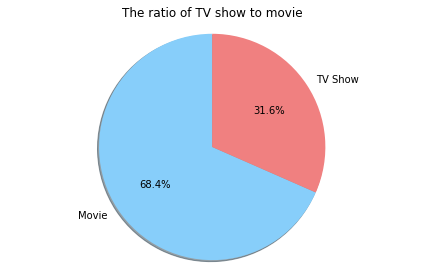

In [3]:
type_labels = netflix['type'].unique()
type_count = [len(netflix[netflix['type'] == 'Movie']), len(netflix[netflix['type'] == 'TV Show'])]
type_colours = ['lightskyblue', 'lightcoral']
plt.title('The ratio of TV show to movie')
plt.pie(type_count,labels=type_labels,colors=type_colours,startangle=90,shadow=True,autopct='%.1f%%',radius=1.5)
plt.axis('equal')
plt.tight_layout()

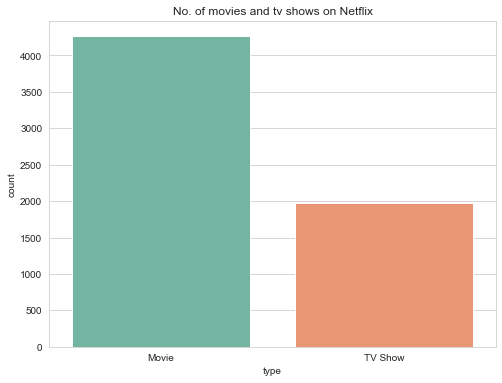

In [4]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
plt.title('No. of movies and tv shows on Netflix')
sns.countplot(x='type',data=netflix,palette='Set2')

In [5]:
#Catergorizing "Duration"
netflix['Season'] = netflix.apply(lambda s: int(s['duration'].strip(' Season')) if 'Season' in s['duration'] else np.NaN, axis=1)
netflix['Duration'] =netflix.apply(lambda s: int(s['duration'].strip(' min')) if 'min' in s['duration'] else np.NaN, axis=1)

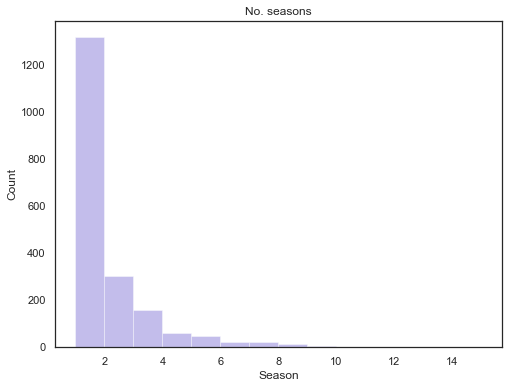

In [6]:
sns.set(style="white", palette="muted", color_codes=True)
plt.figure(figsize=(8,6))
plt.title('No. seasons')
plt.xlabel('Season')
plt.ylabel('Count')
sns.distplot(sorted(netflix['Season'].dropna()),bins=14,kde=False,color='Slateblue')

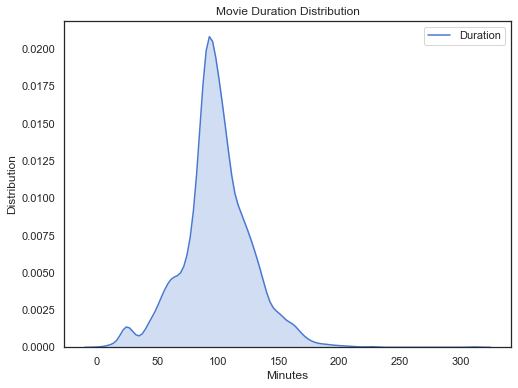

In [7]:
sns.set(style="white", palette="muted", color_codes=True)
plt.figure(figsize=(8,6))
plt.title('Movie Duration Distribution')
plt.xlabel('Minutes')
plt.ylabel('Distribution')
sns.kdeplot(netflix['Duration'].dropna(),shade=True)

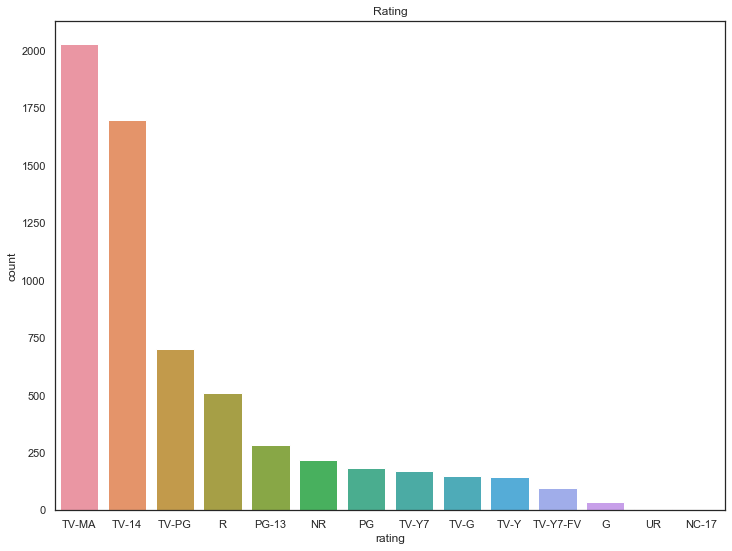

In [8]:
plt.figure(figsize=(12,9))
plt.title('Rating')
sns.countplot(x='rating',data=netflix,order = netflix['rating'].value_counts().index)

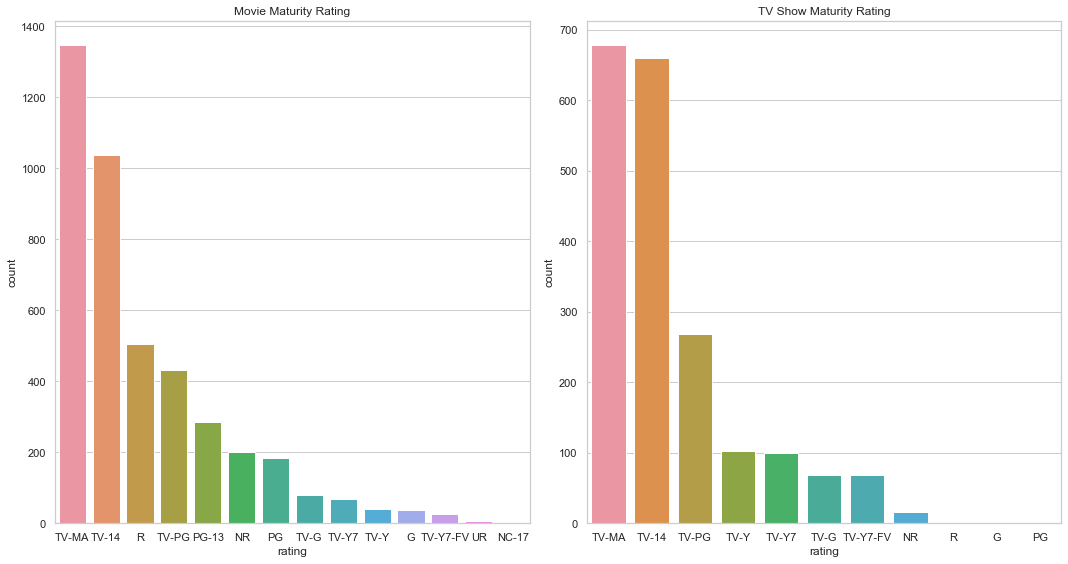

In [9]:
fig = plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
plt.subplot(1, 2, 1)
plt.title('Movie Maturity Rating')
sns.countplot(x='rating',data=netflix[netflix['type'] == 'Movie'],order = netflix[netflix['type'] == 'Movie']['rating'].value_counts().index)
plt.subplot(1, 2, 2)
plt.title('TV Show Maturity Rating')
sns.countplot(x='rating',data=netflix[netflix['type'] == 'TV Show'],order = netflix[netflix['type'] == 'TV Show']['rating'].value_counts().index)
plt.tight_layout()

[]

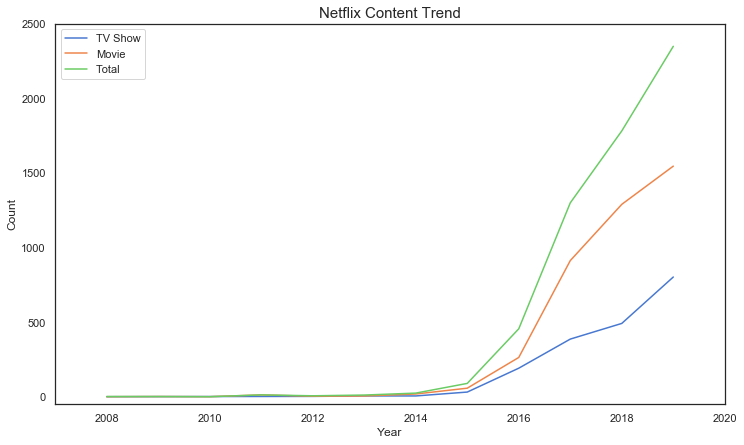

In [11]:
netflix['year_added'] = netflix['date_added'].dropna().apply(lambda y: int(y.split()[-1]))
sns.set_style('white')
fig = plt.figure(figsize=(12,7))
ax = plt.subplot(111)
plt.title('Netflix Content Trend',fontsize=15)
ax.set_xlim(netflix['year_added'].min()-1,2020)
ax.set_ylim(-50,2500)
ax.plot(netflix[(netflix['type'] == 'TV Show')&(netflix['year_added']<2020)]['year_added'].value_counts().sort_index(),label='TV Show')
ax.plot(netflix[(netflix['type'] == 'Movie')&(netflix['year_added']<2020)]['year_added'].value_counts().sort_index(),label='Movie')
ax.plot(netflix[netflix['year_added']<2020]['year_added'].value_counts().sort_index(),label='Total')
ax.legend(loc=0)
plt.xlabel('Year')
plt.ylabel('Count')
ax.plot()

In [12]:
from collections import Counter
netflix_genre = pd.Series(dict(Counter(','.join(netflix['listed_in']).replace(' ,',',').replace(', ', ',').split(',')))).sort_values(ascending=False)
netflix_genre

International Movies            1927
Dramas                          1623
Comedies                        1113
International TV Shows          1001
Documentaries                    668
TV Dramas                        599
Action & Adventure               597
Independent Movies               552
TV Comedies                      436
Thrillers                        392
Children & Family Movies         378
Romantic Movies                  376
Crime TV Shows                   363
Kids' TV                         328
Stand-Up Comedy                  281
Docuseries                       279
Romantic TV Shows                278
Horror Movies                    262
Music & Musicals                 243
British TV Shows                 210
Sci-Fi & Fantasy                 193
Sports Movies                    157
Reality TV                       153
Korean TV Shows                  132
TV Action & Adventure            126
Anime Series                     117
Spanish-Language TV Shows        117
C

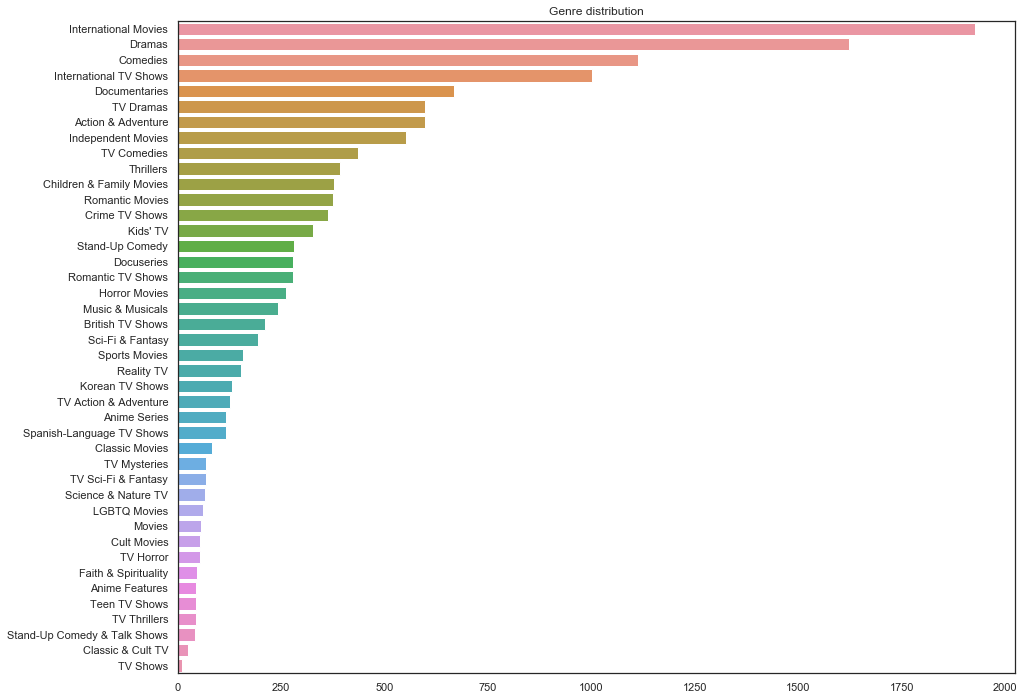

In [13]:
plt.figure(figsize=(15,12))
plt.title('Genre distribution')
sns.barplot(netflix_genre, netflix_genre.index)

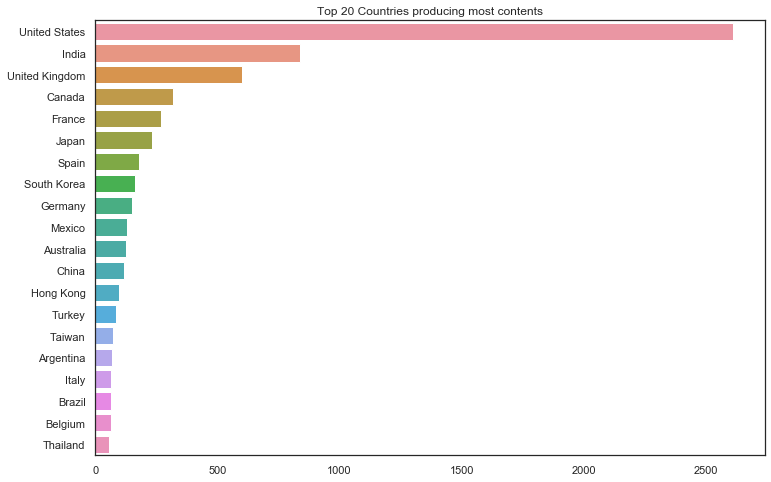

In [14]:
netflix_country = pd.Series(dict(Counter(','.join(netflix['country'].dropna()).replace(' ,',',').replace(', ', ',').split(',')))).sort_values(ascending=False)
plt.figure(figsize=(12,8))
plt.title('Top 20 Countries producing most contents')
sns.barplot(netflix_country[:20], netflix_country.index[:20])

In [15]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
stop = stopwords.words('english') + list(string.punctuation)
keyword_count=[i for i in word_tokenize(' '.join(netflix['description']).lower()) if i not in stop and i.isalpha()]
keywords = pd.Series(dict(Counter(keyword_count))).sort_values(ascending=False)
keywords[:20]

life           557
young          511
new            483
family         415
world          386
man            377
two            360
love           336
woman          329
friends        303
series         287
documentary    260
one            251
must           246
find           236
school         233
finds          218
three          216
father         213
help           212
dtype: int64

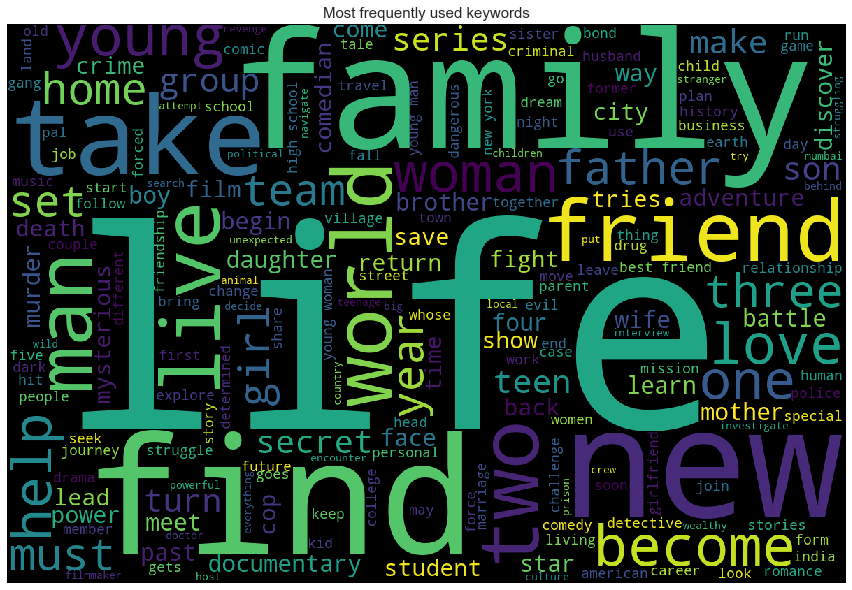

In [16]:
from wordcloud import WordCloud
keywords_wordcloud = ' '.join([i for i in word_tokenize(' '.join(netflix['description']).lower()) if i not in stop and i.isalpha()])
wordcloud = WordCloud(background_color = 'black',width=1200,height=800).generate(keywords_wordcloud)
plt.figure(figsize = (20, 8), facecolor = None) 
plt.title('Most frequently used keywords',fontsize=15)
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Recommendation System

In [17]:
netflix = netflix.drop('show_id',axis=1)
netflix.fillna('',inplace=True)

In [18]:
netflix_tv = netflix[netflix['type'] == 'TV Show']
netflix_movies = netflix[netflix['type'] == 'Movie']
netflix_tv.reset_index(drop=True, inplace=True)
netflix_movies.reset_index(drop=True, inplace=True)

In [19]:
from rake_nltk import Rake
r = Rake()
def keywords(x):
    r.extract_keywords_from_text(x['description'])
    return list(r.get_word_degrees()) 


netflix_tv['keywords'] = netflix_tv.apply(keywords,axis=1)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
netflix_tv.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Season,Duration,year_added,keywords
0,TV Show,Transformers Prime,,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",1,,2018,"[protect, earth, megatron, autobots, onslaught..."
1,TV Show,Transformers: Robots in Disguise,,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,1,,2018,"[prison, ship, crash, unleashes, hundreds, new..."
2,TV Show,Apaches,,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,1,,2017,"[save, young, journalist, life, crime, forced,..."
3,TV Show,Fire Chasers,,,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",1,,2017,"[save, lives, 2016, fire, season, rages, prote..."
4,TV Show,Castle of Stars,,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...,1,,2018,"[joy, sorrow, ebbs, good, life, flows, differe..."


In [21]:
netflix_tv['cast'] = netflix_tv['cast'].apply(lambda x: x.lower().replace(' ','').split(','))
netflix_tv['director'] = netflix_tv['director'].apply(lambda x: x.lower().replace(' ','').split(','))
netflix_tv['listed_in'] = netflix_tv['listed_in'].apply(lambda x: x.lower().replace(' ','').split(','))
netflix_tv['country'] = netflix_tv['country'].apply(lambda x: x.lower().replace(' ','').split(','))

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [22]:
netflix_tv['cast'] = netflix_tv['cast'].apply(lambda x : ' '.join(x).lower())
netflix_tv['country'] = netflix_tv['country'].apply(lambda x : ' '.join(x).lower())
netflix_tv['director'] = netflix_tv['director'].apply(lambda x : ' '.join(x).lower())
netflix_tv['listed_in'] = netflix_tv['listed_in'].apply(lambda x : ' '.join(x).lower())
netflix_tv['title'] = netflix_tv['title'].apply(lambda x : x.lower())

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [23]:
netflix_tv['keywords'] = netflix_tv['keywords'].apply(lambda x : ' '.join(x).lower())

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
netflix_tv['soup'] = netflix_tv.apply(lambda x: ' '.join([x['title']+' '+x['cast']+' '+x['director']+' '+x['rating']+' '+x['keywords']]),axis=1)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(netflix_tv['soup'])
tfidf_matrix.shape

(1969, 21275)

In [26]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)
cosine_sim.shape

(1969, 1969)

In [27]:
indices = pd.Series(netflix_tv.index, index=netflix[netflix['type'] == 'TV Show']['title'])
indices

title
Transformers Prime                                0
Transformers: Robots in Disguise                  1
Apaches                                           2
Fire Chasers                                      3
Castle of Stars                                   4
                                               ... 
Kikoriki                                       1964
Red vs. Blue                                   1965
Maron                                          1966
A Young Doctor's Notebook and Other Stories    1967
Friends                                        1968
Length: 1969, dtype: int64

In [30]:
import difflib
def get_recommendations(title, cosine_sim=cosine_sim):
    try:
        idx = indices[title]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1],reverse =True)
        sim_scores = sim_scores[1:11]
        movie_indices = [i[0] for i in sim_scores]
        return netflix_tv['title'].iloc[movie_indices]
    except:
        return 'Do you mean {}?'.format(difflib.get_close_matches(title, netflix['title'].values.tolist())[0])

In [31]:
get_recommendations("Friend")

'Do you mean Friends?'

In [32]:
get_recommendations("Friends")

1723                                   episodes
605                                  life story
1007                       single ladies senior
1395                            bojack horseman
1292                                 jinglekids
1294    midnight misadventures with mallika dua
1285         o-negative, love can’t be designed
1444                              little things
601            melodies of life - born this way
1566                                 dad's army
Name: title, dtype: object